<a href="https://colab.research.google.com/github/Jorge-Alvarez-23/Data-Science-II_Coder/blob/main/Proy_PreEntrega_Alvarez%20Jorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Problematica

El mercado de computadoras se caracteriza por su gran variedad de marcas y especificaciones técnicas, que en conjunto, determinan el valor final de los dispositivos. Tanto para vendedores como para compradores, es crucial entender qué factores tienen un mayor impacto en el precio para tomar decisiones acertadas. Factores como el procesador, la memoria RAM, el almacenamiento, la tarjeta gráfica y el sistema operativo juegan un papel importante en la valoración de una computadora. Este análisis tiene como finalidad identificar las características que más afectan el precio final.


# 2- Objetivo

### 2.A Objetivo Principal

¿Qué características las computadoras tienen mayor incidencia en el precio?

Determinar como influyen en la variación de precios de las computadoras, las especificaciones técnicas, como ser, el procesador, la memoria RAM, el almacenamiento, la tarjeta gráfica, además de aspectos como la marca y el sistema operativo entre otros. Este análisis tiene como finalidad identificar las características que más afectan el precio final.

### 2-B Objetivo Secundario

1. ¿Como impacta la Generacion del Procesador y Velocidad del Procesado en el precio de las computadoras de diferentes marcas ?


2. ¿Como impacta la posibilidad de Memoria Expandible y la Generación del Procesado en el precio de las computadoras

# 3- DataSet


### Fuente

El dataset utilizado para este proyecto fue descargado del siguiente sitio:

[Link:](https://www.kaggle.com/code/devraai/computer-price-prediction-analysis/notebook)





### Caracteristicas Generales

Este dataset probee informacion sobre precios de computadoras destacando sus caracteristicas y diversidad de marcas, posee 2467 registros y 28 columnas.

# 4- Data wrangling

### A. Importación y lectura del dataset

In [1]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Bloque de codigo encargado de cargar los datos a partir de una url de github y ponerlos en un dataframe


# URL del archivo de texto
url = 'https://github.com/Jorge-Alvarez-23/Data-Science-II_Coder/raw/71fd5a73a7c07ffce06afede3fbb38e4ca609c76/masaustu_data_kaggle.csv'

# Hacer la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Leer el contenido CSV directamente en un DataFrame
    datos = StringIO(response.text)  # Convertir el texto a un objeto similar a un archivo
    df = pd.read_csv(datos)  # Leer el contenido en un DataFrame

    # Establecer opción para mostrar todas las columnas
    pd.set_option('display.max_columns', None)  # Muestra todas las columnas
    pd.set_option('display.expand_frame_repr', False)  # Evita que se divida el DataFrame en múltiples líneas

    # Mostrar el DataFrame
    print(df)
else:
    print(f'Error al acceder al archivo: {response.status_code}')

      Marka     Fiyat   İşlemci Tipi SSD Kapasitesi Ram (Sistem Belleği)              Ekran Kartı Kapasite                 İşletim Sistemi Ekran Kartı Bellek Tipi Ekran Kartı Tipi                 Garanti Tipi Ram (Sistem Belleği) Tipi İşlemci Çekirdek Sayısı  İşlemci Nesli İşlemci Modeli   Çözünürlük Power Supply Kullanım Amacı Ekran Kartı Hafızası Temel İşlemci Hızı (GHz) Bağlantılar Cihaz Ağırlığı    Ekran Boyutu İşlemci Frekansı Ekran Yenileme Hızı Panel Tipi Menşei Arttırılabilir Azami Bellek
0     XASER  13716.90  Intel Core i5         512 GB                16 GB        AMD Radeon RX 550   512 GB  Free Dos (İşletim Sistemi Yok)                   GDDR5           Harici  Resmi Distribütör Garantili                      DDR3                       4       3. Nesil           3470          NaN          NaN            NaN                  NaN                      NaN         NaN            NaN             NaN              NaN                 NaN        NaN    NaN                         

### B. Diccionario de variables

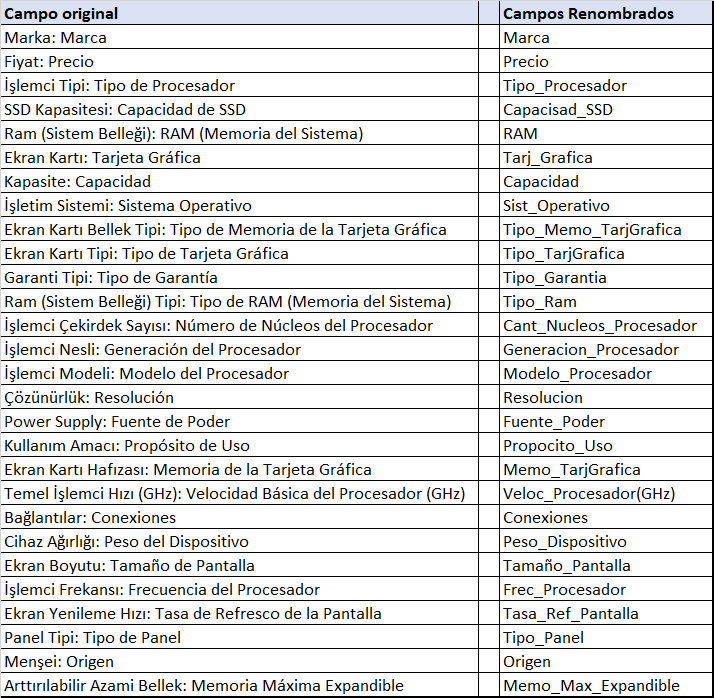

### C. Renombre de Variables

In [3]:
df.columns.tolist()

['Marka',
 'Fiyat',
 'İşlemci Tipi',
 'SSD Kapasitesi',
 'Ram (Sistem Belleği)',
 'Ekran Kartı',
 'Kapasite',
 'İşletim Sistemi',
 'Ekran Kartı Bellek Tipi',
 'Ekran Kartı Tipi',
 'Garanti Tipi',
 'Ram (Sistem Belleği) Tipi',
 'İşlemci Çekirdek Sayısı',
 'İşlemci Nesli',
 'İşlemci Modeli',
 'Çözünürlük',
 'Power Supply',
 'Kullanım Amacı',
 'Ekran Kartı Hafızası',
 'Temel İşlemci Hızı (GHz)',
 'Bağlantılar',
 'Cihaz Ağırlığı',
 'Ekran Boyutu',
 'İşlemci Frekansı',
 'Ekran Yenileme Hızı',
 'Panel Tipi',
 'Menşei',
 'Arttırılabilir Azami Bellek']

In [4]:
#Para una mayor comprension del dataset, se procedio a traducir el nombre de cada campo al español (se uso IA)

df.rename(columns={
    'Marka': 'Marca',
    'Fiyat': 'Precio',
    'İşlemci Tipi':'Tipo_Procesador',
    'SSD Kapasitesi': 'Capacidad_SSD',
    'Ram (Sistem Belleği)': 'RAM',
    'Ekran Kartı': 'Tarj_Grafica',
    'Kapasite': 'Capacidad',
    'İşletim Sistemi': 'Sist_Operativo',
    'Ekran Kartı Bellek Tipi':'Tipo_Memo_TarjGrafica',
    'Ekran Kartı Tipi':'Tipo_TarjGrafica',
    'Garanti Tipi': 'Tipo_Garantia',
    'Ram (Sistem Belleği) Tipi' : 'Tipo_Ram',
    'İşlemci Çekirdek Sayısı': 'Cant_Nucleos_Procesador',
    'İşlemci Nesli': 'Generacion_Procesador',
    'İşlemci Modeli':'Modelo_Procesador',
    'Çözünürlük':'Resolucion',
    'Power Supply':'Fuente_Poder',
    'Kullanım Amacı':'Proposito_Uso',
    'Ekran Kartı Hafızası':'Memo_TarjGrafica',
    'Temel İşlemci Hızı (GHz)':'Veloc_Procesador(GHz)',
    'Bağlantılar':'Conexiones',
    'Cihaz Ağırlığı':'Peso_Dispositivo',
    'Ekran Boyutu':'Tamaño_Pantalla',
    'İşlemci Frekansı':'Frec_Procesador',
    'Ekran Yenileme Hızı':'Tasa_Ref_Pantalla',
    'Panel Tipi':'Tipo_Panel',
    'Menşei':'Origen',
    'Arttırılabilir Azami Bellek':'Memo_Max_Expandible'
}, inplace=True)

df

,Marca,Precio,Tipo_Procesador,Capacidad_SSD,RAM,Tarj_Grafica,Capacidad,Sist_Operativo,Tipo_Memo_TarjGrafica,Tipo_TarjGrafica,Tipo_Garantia,Tipo_Ram,Cant_Nucleos_Procesador,Generacion_Procesador,Modelo_Procesador,Resolucion,Fuente_Poder,Proposito_Uso,Memo_TarjGrafica,Veloc_Procesador(GHz),Conexiones,Peso_Dispositivo,Tamaño_Pantalla,Frec_Procesador,Tasa_Ref_Pantalla,Tipo_Panel,Origen,Memo_Max_Expandible
0,XASER,13716.90,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,3. Nesil,3470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DMC,13678.00,Intel Core i5,512 GB,16 GB,Nvidia Geforce GT 740,Yok,Windows,DDR3,Harici,Resmi Distribütör Garantili,DDR3,4,3. Nesil,İ5-3470,1920 x 1080,350 - 500 W,Oyun,4 GB ve altı,3.2,HDMI,Belirtilmemiş,24 inç,3.00 GHz üstü,75 Hz,NaN,NaN,NaN
2,XASER,12857.74,Intel Core i5,512 GB,16 GB,AMD Radeon RX 580,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4. Nesil,4590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DMC,20799.00,Intel Core i5,256 GB,32 GB,AMD Radeon RX 580,256 GB,Windows,GDDR5,Harici,Resmi Distribütör Garantili,DDR4,6,Belirtilmemiş,9400F,1920 x 1080,350 - 500 W,Oyun,8 GB,2.9,HDMI,Belirtilmemiş,"24"" / 61 Ekran",NaN,165 Hz,VA,TR,NaN
4,XASER,12834.62,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4. Nesil,4590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,HP,42606.03,Intel Core i7,1 TB,64 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13. Nesil,13700,NaN,NaN,Ofis - İş,4 GB ve altı,1.5,USB,NaN,NaN,NaN,NaN,NaN,NaN,64 GB
2463,HP,51946.97,Intel Core i7,2 TB,64 GB,Nvidia GeForce GTX 1650,Yok,Windows,GDDR6,Harici,HP Türkiye Garantili,DDR4,24,13. Nesil,13700,NaN,NaN,Ofis - İş,4 GB ve altı,1.5,USB,NaN,NaN,NaN,NaN,NaN,NaN,64 GB
2464,HP,43954.05,Intel Core i7,4 TB,12 GB,Dahili Ekran Kartı,Yok,Windows,Dahili,Dahili,HP Türkiye Garantili,DDR4,24,13. Nesil,13700,NaN,NaN,Ofis - İş,Paylaşımlı,1.5,USB,NaN,NaN,NaN,NaN,NaN,NaN,64 GB
2465,HP,43963.48,Intel Core i7,2 TB,48 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13. Nesil,13700,NaN,NaN,Ofis - İş,4 GB ve altı,1.5,USB,NaN,NaN,NaN,NaN,NaN,NaN,64 GB


### D. Eliminacion de duplicados

In [5]:
# Muestra la cantidad de registros duplicados

duplicados = df.duplicated()
print(f"Duplicados  encontrados: {duplicados.sum()}")

Duplicados  encontrados: 1


In [6]:
# Elimina los registro duplicados

df = df.drop_duplicates()
print(f"Data despues de eliminar duplicados: {len(df)} filas")

Data despues de eliminar duplicados: 2466 filas


### E. Análisis de datos faltantes por columnas

In [7]:
#Muestra la cantidad de NULL que presenta cada columna, ordenados en orden ascendente

df.isnull().sum().sort_values(ascending=True)

,0
Marca,0
Precio,0
Tipo_Garantia,4
Tipo_Procesador,5
Sist_Operativo,5
Capacidad,5
Tarj_Grafica,5
Tipo_Memo_TarjGrafica,6
Modelo_Procesador,10
Generacion_Procesador,18


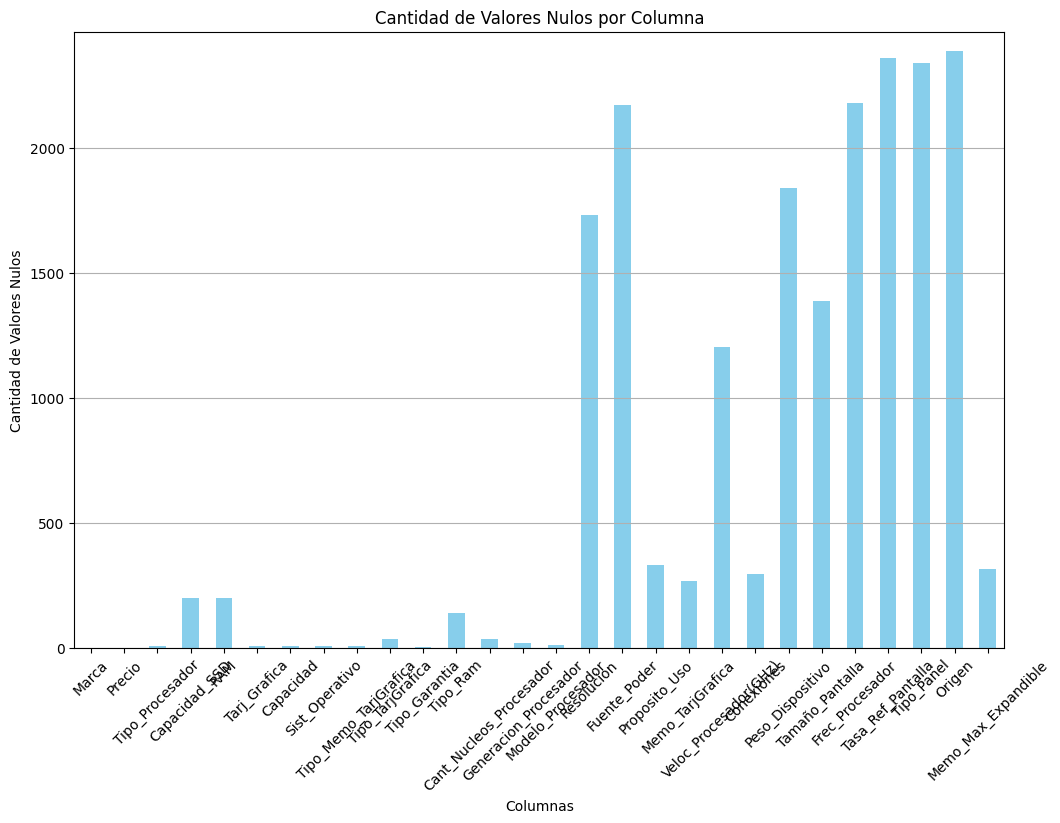

In [8]:
# Calculando la cantidad de valores nulos y el total de registros
null_counts = df.isnull().sum()
total_records = len(df)

# Filtrando las columnas que deseas mostrar
columns_to_plot = [
    'Marca', 'Precio', 'Tipo_Procesador', 'Capacidad_SSD',
    'RAM', 'Tarj_Grafica', 'Capacidad', 'Sist_Operativo',
    'Tipo_Memo_TarjGrafica', 'Tipo_TarjGrafica', 'Tipo_Garantia',
    'Tipo_Ram', 'Cant_Nucleos_Procesador', 'Generacion_Procesador',
    'Modelo_Procesador', 'Resolucion', 'Fuente_Poder',
    'Proposito_Uso', 'Memo_TarjGrafica', 'Veloc_Procesador(GHz)',
    'Conexiones', 'Peso_Dispositivo', 'Tamaño_Pantalla',
    'Frec_Procesador', 'Tasa_Ref_Pantalla', 'Tipo_Panel',
    'Origen', 'Memo_Max_Expandible'
]

# Filtra las cuentas de nulos para las columnas específicas
null_counts_filtered = null_counts[columns_to_plot]

# Grafica
plt.figure(figsize=(12, 8))
ax = null_counts_filtered.plot(kind='bar', color='skyblue')

# Ajusta los límites del eje x para que reflejen el total de registros del DataFrame
ax.set_ylim(0, total_records)

# Establecer el título, etiquetas y añadir cuadrícula
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

En este grafico de barras se puede observar de una manera visual, la insidencia de valores nulos en cada variable del dataframe.

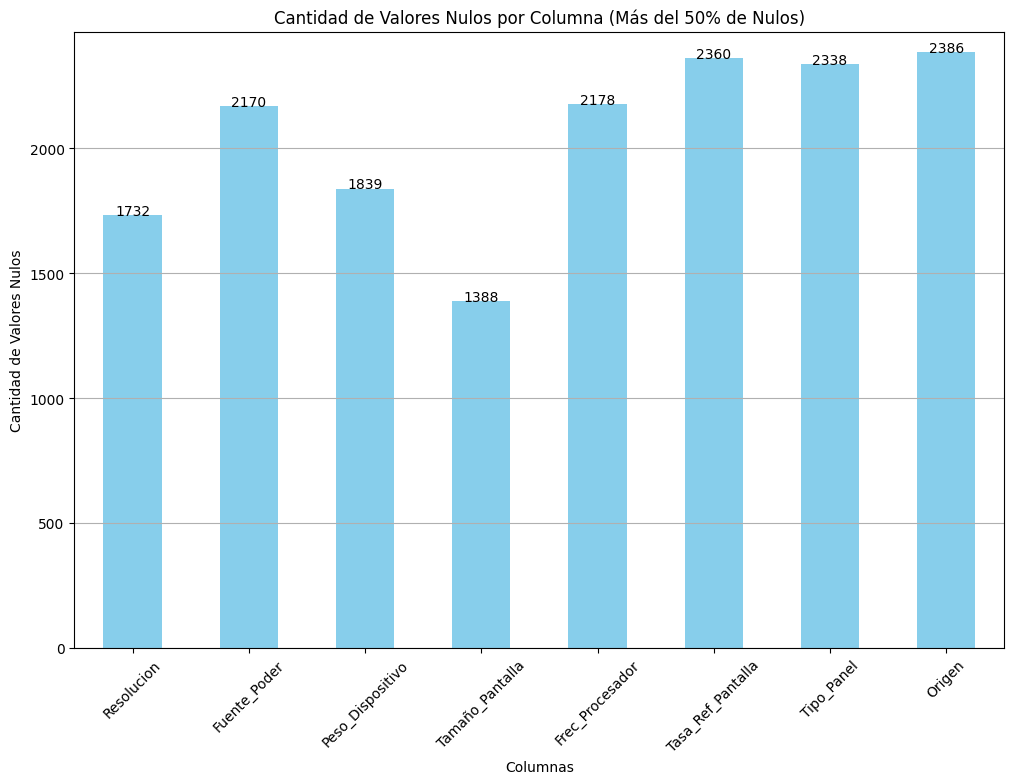

In [9]:
# Calculando la cantidad de valores nulos y el total de registros
null_counts = df.isnull().sum()
total_records = len(df)

# Filtrando solo las columnas que tienen más del 50% de nulos
threshold = total_records * 0.5
null_counts_filtered = null_counts[null_counts > threshold]

# Grafico
plt.figure(figsize=(12, 8))
ax = null_counts_filtered.plot(kind='bar', color='skyblue')

# Establecer el límite del eje y igual al total de registros del DataFrame
ax.set_ylim(0, total_records)

# Establecer el título, etiquetas y añadir cuadrícula
plt.title('Cantidad de Valores Nulos por Columna (Más del 50% de Nulos)')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')

# Añadiendo el número de nulos sobre cada barra
for i in range(len(null_counts_filtered)):
    ax.text(i, null_counts_filtered.iloc[i] + 0.1, f'{null_counts_filtered.iloc[i]}', ha='center')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




De acuerdo a lo encontrado en el grafico podemos considerar lo siguiente se podrian eliminar las columnas origen, tipo_panel, tasa_ref_pantalla, frec_procesador, fuente_poder, peso_Dispositivo por el alto numero de valores nulos que presentan estas columnas

####  Eliminacion de Variables

In [10]:
# se eliminaran las columnas con un alto nivel de valores nulos   "NOTA PARA TENER EN CUENTA: JUSTIFICAR EL PORQUE SE ELIMINA CADA CAMPO"
# Eliminar las columnas especificadas
columns_to_remove = [
    'Fuente_Poder',
    'Peso_Dispositivo',
    'Tamaño_Pantalla',
    'Frec_Procesador',
    'Tasa_Ref_Pantalla',
    'Tipo_Panel',
    'Origen'
]

df.drop(columns=columns_to_remove, inplace=True)

# Verificación de las columnas restantes en el DataFrame


<ipython-input-10-b6f129c531b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_remove, inplace=True)


### F. Análisis de datos faltantes por Filas

In [11]:
# Se muestra los registros a traves de sus indeces que mas valores nulos presentan, ordenados de forma descendente

df.isnull().sum(axis=1).sort_values(ascending=False).head(20)

,0
414,19
351,18
96,17
5,16
396,12
453,12
291,12
15,12
600,12
323,12


In [12]:
# Muestra los registros que tienen  16 o mas campos con valores nulos
df[df.isnull().sum(axis=1) >=16].reset_index()

,index,Marca,Precio,Tipo_Procesador,Capacidad_SSD,RAM,Tarj_Grafica,Capacidad,Sist_Operativo,Tipo_Memo_TarjGrafica,Tipo_TarjGrafica,Tipo_Garantia,Tipo_Ram,Cant_Nucleos_Procesador,Generacion_Procesador,Modelo_Procesador,Resolucion,Proposito_Uso,Memo_TarjGrafica,Veloc_Procesador(GHz),Conexiones,Memo_Max_Expandible
0,5,Zeiron,13184.00,NaN,256 GB,NaN,NaN,1 TB,NaN,NaN,NaN,Zeiron TÃ¼rkiye Garantili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96,Apple,59399.01,NaN,NaN,NaN,NaN,Yok,NaN,NaN,NaN,Apple TÃ¼rkiye Garantili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,351,Quadro,5450.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4460,NaN,NaN,NaN,NaN,NaN,NaN
3,414,HP,28334.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Eliminacion de Registros con un alto indice de valores nulos.

In [13]:
# Se procede a eliminar los registros con un alto indice de valores nulos en sus columnas (condicion de eliminacion 16 o mas columnas vacias)

df.drop(index=df[df.isnull().sum(axis=1) >=16].index, inplace=True)

<ipython-input-13-3565593ca667>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=df[df.isnull().sum(axis=1) >=16].index, inplace=True)


### G. Metodologia para tratar los Nan

Una Vez que se identifico las filas y columnas con un alto grado de NaN, se procedio a eliminarlas. Ahora el proximo paso es evaluar las columnas restantes y definir una metodologia para tratar los valores nulos de las mismas.

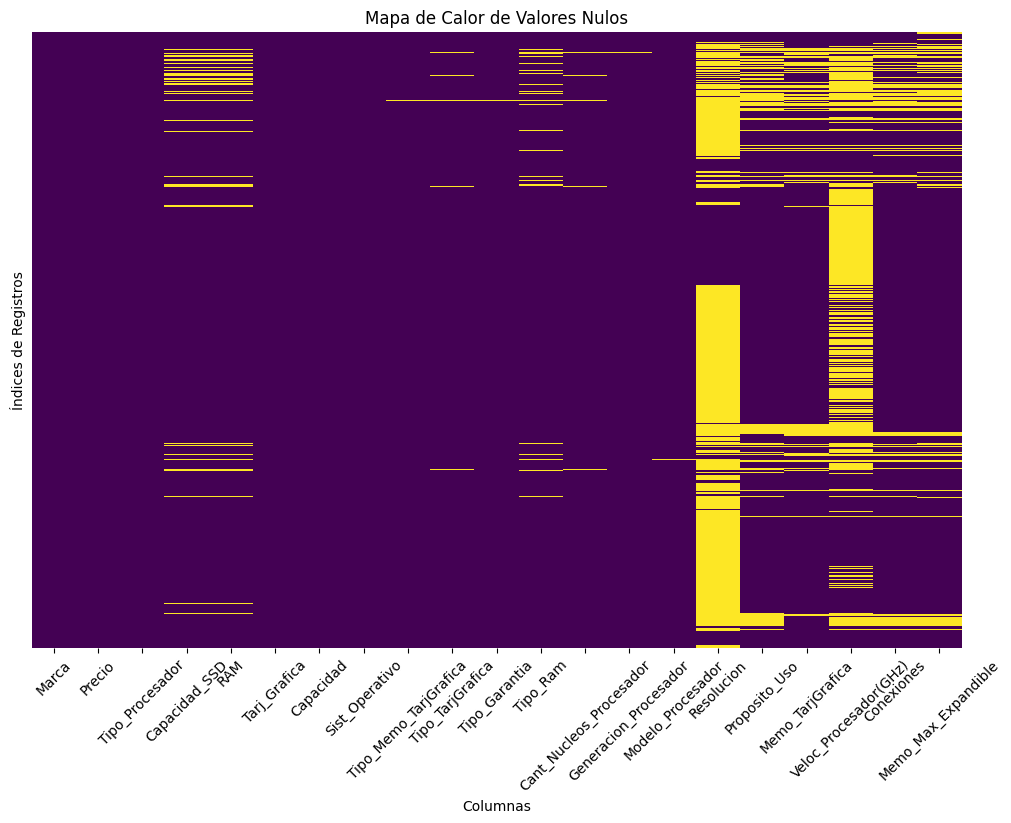

In [14]:
# gráfico de calor que muestre visualmente la presencia de valores nulos en tu DataFrame
#Crear un DataFrame que marque los valores nulos como True
null_heatmap = df.isnull()

# Crear el gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(null_heatmap, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Mapa de Calor de Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Índices de Registros')
plt.xticks(ticks=np.arange(len(null_heatmap.columns)) + 0.5, labels=null_heatmap.columns, rotation=45)
plt.show()

Para reemplazar los NaN que todavian quedan en el DataFrame procederemos de la siguiente forma:
  1. Usando la columna Tipo_Procesador y Generacion_Procesador usaremos la tabla externa "procesador.txt" la cual posee las caracteristicas de cada procesador de acuerdo a su generarcion.

  2 . Usando la columna Tarj_Grafica usaremos la tabla externa "Tarjeta_Grafica.csv", la cual posee las caracteristicas de cada tarjeta grafica del dataset.

#### Reemplazo de NaN usando los campos Tipo_Procesador y Generacion_Procesador

In [15]:
df['Tipo_Procesador'].value_counts().reset_index()

,Tipo_Procesador,count
0,Intel Core i5,1538
1,Intel Core i3,411
2,Intel Core i7,379
3,AMD Ryzen 3,79
4,AMD Ryzen 5,15
5,Intel Xeon,12
6,AMD Ryzen 9,7
7,AMD Ryzen 7,5
8,Intel Pentium,5
9,Intel Core i9,4


In [16]:
df['Generacion_Procesador'] = df['Generacion_Procesador'].str.extract(r'(\d+)')
df['Generacion_Procesador'].value_counts().reset_index()

<ipython-input-16-356e95516ea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Generacion_Procesador'] = df['Generacion_Procesador'].str.extract(r'(\d+)')


,Generacion_Procesador,count
0,12,1256
1,13,706
2,5,98
3,3,83
4,4,50
5,1,43
6,2,41
7,14,33
8,6,28
9,7,27


In [17]:
#Se carga el archivo "procesador.txt" en un DataFrame llamado df_procesador

# Leer el archivo .txt separado por comas
df_procesador = pd.read_csv('https://github.com/Jorge-Alvarez-23/Data-Science-II_Coder/raw/main/procesador.txt', delimiter='\t')

# Mostrar las primeras filas del DataFrame
print(df_procesador.head())

  Tipo_Procesador Cantidad_Nucleos        Modelo Velocidad_Procesador Generacion_Procesador Tipo_RAM
0     AMD Ryzen 3                4  Ryzen 3 1200     3.1 (Turbo: 3.4)                     1     DDR4
1     AMD Ryzen 3                4  Ryzen 3 3100     3.6 (Turbo: 3.9)                     3     DDR4
2     AMD Ryzen 3                4  Ryzen 3 4100     3.8 (Turbo: 4.0)                     5     DDR4
3     AMD Ryzen 5                6  Ryzen 5 1600     3.2 (Turbo: 3.6)                     1     DDR4
4     AMD Ryzen 5                6  Ryzen 5 3600     3.6 (Turbo: 4.2)                     3     DDR4


In [18]:
df_procesador

,Tipo_Procesador,Cantidad_Nucleos,Modelo,Velocidad_Procesador,Generacion_Procesador,Tipo_RAM
0,AMD Ryzen 3,4,Ryzen 3 1200,3.1 (Turbo: 3.4),1,DDR4
1,AMD Ryzen 3,4,Ryzen 3 3100,3.6 (Turbo: 3.9),3,DDR4
2,AMD Ryzen 3,4,Ryzen 3 4100,3.8 (Turbo: 4.0),5,DDR4
3,AMD Ryzen 5,6,Ryzen 5 1600,3.2 (Turbo: 3.6),1,DDR4
4,AMD Ryzen 5,6,Ryzen 5 3600,3.6 (Turbo: 4.2),3,DDR4
...,...,...,...,...,...,...
70,Intel Xeon,8,13700,3.5 GHz,13,DDR4
71,Intel Xeon,NaN,Belirtilmemi?,NaN,NaN,NaN
72,Intel Xeon,NaN,Belirtilmemi?,NaN,NaN,NaN
73,Intel Xeon,16,E52683,2.6 GHz,4,DDR4


In [19]:
# se realiza un join entre los dataframe df y df_procesador, usando como condicion los campos 'Tipo_Procesador','Generacion_Procesador' guardando  esta union en un nueno dataframe

df_Join_Procesador = df.join(df_procesador.set_index(['Tipo_Procesador','Generacion_Procesador']),on=['Tipo_Procesador','Generacion_Procesador'],how='inner')


In [20]:
df_Join_Procesador

,Marca,Precio,Tipo_Procesador,Capacidad_SSD,RAM,Tarj_Grafica,Capacidad,Sist_Operativo,Tipo_Memo_TarjGrafica,Tipo_TarjGrafica,Tipo_Garantia,Tipo_Ram,Cant_Nucleos_Procesador,Generacion_Procesador,Modelo_Procesador,Resolucion,Proposito_Uso,Memo_TarjGrafica,Veloc_Procesador(GHz),Conexiones,Memo_Max_Expandible,Cantidad_Nucleos,Modelo,Velocidad_Procesador,Tipo_RAM
0,XASER,13716.90,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,3,3470,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-3570,3.4,DDR3
1,DMC,13678.00,Intel Core i5,512 GB,16 GB,Nvidia Geforce GT 740,Yok,Windows,DDR3,Harici,Resmi Distribütör Garantili,DDR3,4,3,İ5-3470,1920 x 1080,Oyun,4 GB ve altı,3.2,HDMI,NaN,4,i5-3570,3.4,DDR3
2,XASER,12857.74,Intel Core i5,512 GB,16 GB,AMD Radeon RX 580,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4,4590,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-4670,3.4,DDR3
4,XASER,12834.62,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4,4590,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-4670,3.4,DDR3
7,Zeiron,8909.01,Intel Core i5,256 GB,16 GB,Intel HD Graphics,500 GB,Windows,Dahili,Dahili,Zeiron Türkiye Garantili,DDR3,4,3,İ5-3470,1920 x 1080,Ofis - İş,Paylaşımlı,3.2,HDMI,16 GB,4,i5-3570,3.4,DDR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,HP,42606.03,Intel Core i7,1 TB,64 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5
2463,HP,51946.97,Intel Core i7,2 TB,64 GB,Nvidia GeForce GTX 1650,Yok,Windows,GDDR6,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5
2464,HP,43954.05,Intel Core i7,4 TB,12 GB,Dahili Ekran Kartı,Yok,Windows,Dahili,Dahili,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,Paylaşımlı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5
2465,HP,43963.48,Intel Core i7,2 TB,48 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5


#### Reemplazo de NaN usando el campo Tarj_Grafica|

In [21]:
# Listado de cada tipo de Tarjeta Grafica
df['Tarj_Grafica'].value_counts().reset_index()

,Tarj_Grafica,count
0,AMD Radeon RX550,483
1,Nvidia GeForce GT 730,446
2,Dahili Ekran Kartı,360
3,NVIDIA GeForce GT1030,346
4,Nvidia GeForce GTX 1650,260
5,Intel HD Graphics,201
6,Intel UHD Graphics 770,63
7,AMD Radeon RX 550,60
8,Intel UHD Graphics 730,54
9,AMD Radeon Graphics,30


In [22]:
#Se carga el archivo "Tarjeta_Grafica.csv" en un DataFrame llamado df_Grafica

# Leer el archivo .txt separado por comas
df_Grafica = pd.read_csv('https://github.com/Jorge-Alvarez-23/Data-Science-II_Coder/raw/main/Tarjeta_Grafica.csv', delimiter=',')  # Cambia 'ruta/al/archivo.txt' por la ruta real

# Mostrar las primeras filas del DataFrame
print(df_Grafica.head())

              Tarj_Grafica Tipo_TarjGrafica TipoMemoGrafica                   MemorTarjGráfica      Resolucion_Max                        Conexiones
0         AMD Radeon RX550         Dedicada           GDDR5                                4GB         4096 x 2160            DisplayPort, HDMI, DVI
1    Nvidia GeForce GT 730         Dedicada    GDDR5 / DDR3                                2GB         4096 x 2160                    HDMI, DVI, VGA
2       Dahili Ekran Kartı        Integrada      Compartida  Compartida con la RAM del sistema  Varía según la CPU  Varía según la placa madre y CPU
3    NVIDIA GeForce GT1030         Dedicada           GDDR5                                2GB         7680 x 4320         HDMI, DisplayPort (o DVI)
4  Nvidia GeForce GTX 1650         Dedicada   GDDR5 / GDDR6                                4GB         7680 x 4320            DisplayPort, HDMI, DVI


In [23]:
df_Grafica

,Tarj_Grafica,Tipo_TarjGrafica,TipoMemoGrafica,MemorTarjGráfica,Resolucion_Max,Conexiones
0,AMD Radeon RX550,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
1,Nvidia GeForce GT 730,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
2,Dahili Ekran Kartı,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
3,NVIDIA GeForce GT1030,Dedicada,GDDR5,2GB,7680 x 4320,"HDMI, DisplayPort (o DVI)"
4,Nvidia GeForce GTX 1650,Dedicada,GDDR5 / GDDR6,4GB,7680 x 4320,"DisplayPort, HDMI, DVI"
5,Intel HD Graphics,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
6,Intel UHD Graphics 770,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
7,AMD Radeon RX 550,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
8,Intel UHD Graphics 730,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
9,AMD Radeon Graphics,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU


In [24]:
# se realiza un join entre los dataframe df_Join_Procesador y df_Grafica, usando como condicion el campo Tarj_Grafica, guardando  esta union en un nueno dataframe

df_Join = df_Join_Procesador.join(df_Grafica.set_index('Tarj_Grafica'),on= 'Tarj_Grafica',how='inner',lsuffix='_left')

In [25]:
df_Join

,Marca,Precio,Tipo_Procesador,Capacidad_SSD,RAM,Tarj_Grafica,Capacidad,Sist_Operativo,Tipo_Memo_TarjGrafica,Tipo_TarjGrafica_left,Tipo_Garantia,Tipo_Ram,Cant_Nucleos_Procesador,Generacion_Procesador,Modelo_Procesador,Resolucion,Proposito_Uso,Memo_TarjGrafica,Veloc_Procesador(GHz),Conexiones_left,Memo_Max_Expandible,Cantidad_Nucleos,Modelo,Velocidad_Procesador,Tipo_RAM,Tipo_TarjGrafica,TipoMemoGrafica,MemorTarjGráfica,Resolucion_Max,Conexiones
0,XASER,13716.90,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,3,3470,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-3570,3.4,DDR3,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
1,DMC,13678.00,Intel Core i5,512 GB,16 GB,Nvidia Geforce GT 740,Yok,Windows,DDR3,Harici,Resmi Distribütör Garantili,DDR3,4,3,İ5-3470,1920 x 1080,Oyun,4 GB ve altı,3.2,HDMI,NaN,4,i5-3570,3.4,DDR3,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
2,XASER,12857.74,Intel Core i5,512 GB,16 GB,AMD Radeon RX 580,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4,4590,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-4670,3.4,DDR3,Dedicada,GDDR5,8GB,7680 x 4320,"DisplayPort, HDMI, DVI"
4,XASER,12834.62,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4,4590,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-4670,3.4,DDR3,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
7,Zeiron,8909.01,Intel Core i5,256 GB,16 GB,Intel HD Graphics,500 GB,Windows,Dahili,Dahili,Zeiron Türkiye Garantili,DDR3,4,3,İ5-3470,1920 x 1080,Ofis - İş,Paylaşımlı,3.2,HDMI,16 GB,4,i5-3570,3.4,DDR3,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,HP,42606.03,Intel Core i7,1 TB,64 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
2463,HP,51946.97,Intel Core i7,2 TB,64 GB,Nvidia GeForce GTX 1650,Yok,Windows,GDDR6,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / GDDR6,4GB,7680 x 4320,"DisplayPort, HDMI, DVI"
2464,HP,43954.05,Intel Core i7,4 TB,12 GB,Dahili Ekran Kartı,Yok,Windows,Dahili,Dahili,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,Paylaşımlı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
2465,HP,43963.48,Intel Core i7,2 TB,48 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"


Como ultimo paso para definir el dataframe del proyecto, procederemos a copiar en un nuevo dataframe (df_Proy) los campos con la informacion obtenida de los join anteriores.

In [26]:
df_Proy = df_Join[['Marca','Precio','Tipo_Procesador','Capacidad_SSD','RAM','Tarj_Grafica','Sist_Operativo','Tipo_Garantia','Generacion_Procesador','Proposito_Uso','Memo_Max_Expandible','Cantidad_Nucleos','Modelo','Velocidad_Procesador','Tipo_RAM','Tipo_TarjGrafica','TipoMemoGrafica','MemorTarjGráfica','Resolucion_Max','Conexiones']].copy()

In [27]:
df_Proy

,Marca,Precio,Tipo_Procesador,Capacidad_SSD,RAM,Tarj_Grafica,Sist_Operativo,Tipo_Garantia,Generacion_Procesador,Proposito_Uso,Memo_Max_Expandible,Cantidad_Nucleos,Modelo,Velocidad_Procesador,Tipo_RAM,Tipo_TarjGrafica,TipoMemoGrafica,MemorTarjGráfica,Resolucion_Max,Conexiones
0,XASER,13716.90,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,Free Dos (İşletim Sistemi Yok),Resmi Distribütör Garantili,3,NaN,NaN,4,i5-3570,3.4,DDR3,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
1,DMC,13678.00,Intel Core i5,512 GB,16 GB,Nvidia Geforce GT 740,Windows,Resmi Distribütör Garantili,3,Oyun,NaN,4,i5-3570,3.4,DDR3,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
2,XASER,12857.74,Intel Core i5,512 GB,16 GB,AMD Radeon RX 580,Free Dos (İşletim Sistemi Yok),Resmi Distribütör Garantili,4,NaN,NaN,4,i5-4670,3.4,DDR3,Dedicada,GDDR5,8GB,7680 x 4320,"DisplayPort, HDMI, DVI"
4,XASER,12834.62,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,Free Dos (İşletim Sistemi Yok),Resmi Distribütör Garantili,4,NaN,NaN,4,i5-4670,3.4,DDR3,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
7,Zeiron,8909.01,Intel Core i5,256 GB,16 GB,Intel HD Graphics,Windows,Zeiron Türkiye Garantili,3,Ofis - İş,16 GB,4,i5-3570,3.4,DDR3,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,HP,42606.03,Intel Core i7,1 TB,64 GB,Nvidia GeForce GT 730,Windows,HP Türkiye Garantili,13,Ofis - İş,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
2463,HP,51946.97,Intel Core i7,2 TB,64 GB,Nvidia GeForce GTX 1650,Windows,HP Türkiye Garantili,13,Ofis - İş,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / GDDR6,4GB,7680 x 4320,"DisplayPort, HDMI, DVI"
2464,HP,43954.05,Intel Core i7,4 TB,12 GB,Dahili Ekran Kartı,Windows,HP Türkiye Garantili,13,Ofis - İş,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
2465,HP,43963.48,Intel Core i7,2 TB,48 GB,Nvidia GeForce GT 730,Windows,HP Türkiye Garantili,13,Ofis - İş,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"


In [28]:
#Mostramos el estado con respecto a NaN del dataframe resultante

df_Proy.isnull().sum().reset_index()

,index,0
0,Marca,0
1,Precio,0
2,Tipo_Procesador,0
3,Capacidad_SSD,177
4,RAM,177
5,Tarj_Grafica,0
6,Sist_Operativo,0
7,Tipo_Garantia,1
8,Generacion_Procesador,0
9,Proposito_Uso,284


#### Analisis por columnas y conversion de tipo de datos

Analisis de la columna Capacidad_SSD

En esta columna encontramos que hay 177 valores NaN, ya que se desconoce el motivo que lleva a esta falta de valores se procede a imputar por la mediana,  se procede a unificar la unidad de medida y a eliminar la unidad del dato.

In [29]:
df_Proy['Capacidad_SSD'].value_counts().reset_index()

,Capacidad_SSD,count
0,4 TB,578
1,256 GB,407
2,1 TB,391
3,2 TB,378
4,512 GB,373
5,128 GB,17
6,500 GB,10
7,240 GB,10
8,480 GB,3
9,250 GB,2


In [30]:
# Se Elimina la unidad "GB"
df_Proy['Capacidad_SSD'] = df_Proy['Capacidad_SSD'].str.replace(' GB', '')

# Se elimina la unidad "TB" y se unifica el valor del dato a GB, se completa con 000
df_Proy['Capacidad_SSD'] = df_Proy['Capacidad_SSD'].str.replace(' TB', '000')

# Se Convierte el valor "SSD YOK" al valor cero "0"
df_Proy['Capacidad_SSD'] = df_Proy['Capacidad_SSD'].str.replace('SSD Yok', '0')

# Para poder hace el cambio del tipo de dato
df_Proy['Capacidad_SSD'] = df_Proy['Capacidad_SSD'].fillna(0)
df_Proy['Capacidad_SSD'] = df_Proy['Capacidad_SSD'].astype('int32')

# Se renombre el campo para especificar la unidad del  campo (GB)
df_Proy.rename(columns={'Capacidad_SSD': 'Capacidad_SSD(GB)'}, inplace=True)

Imputacion de los valores faltantes de la columna  Capacidad_SDD usando la mediana

In [31]:
# Se reemplaza con la mediana

median_capacidad = df_Proy[df_Proy['Capacidad_SSD(GB)'] != 0]['Capacidad_SSD(GB)'].median()

# 2. Reemplazar solo los ceros (que eran NaN) con la mediana:
df_Proy['Capacidad_SSD(GB)'] = df_Proy['Capacidad_SSD(GB)'].replace(0, median_capacidad).astype('int32')

In [32]:
df_Proy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2350 entries, 0 to 2466
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Marca                  2350 non-null   object 
 1   Precio                 2350 non-null   float64
 2   Tipo_Procesador        2350 non-null   object 
 3   Capacidad_SSD(GB)      2350 non-null   int32  
 4   RAM                    2173 non-null   object 
 5   Tarj_Grafica           2350 non-null   object 
 6   Sist_Operativo         2350 non-null   object 
 7   Tipo_Garantia          2349 non-null   object 
 8   Generacion_Procesador  2350 non-null   object 
 9   Proposito_Uso          2066 non-null   object 
 10  Memo_Max_Expandible    2097 non-null   object 
 11  Cantidad_Nucleos       2350 non-null   object 
 12  Modelo                 2350 non-null   object 
 13  Velocidad_Procesador   2350 non-null   object 
 14  Tipo_RAM               2350 non-null   object 
 15  Tipo_Tarj

Analisis de la columna RAM

En esta columna encontramos que hay 177 valores NaN, ya que se desconoce el motivo que lleva a esta falta de valores se procede a imputar por la mediana, se procede a unificar la unidad de medida y a eliminar la unidad del dato.

In [33]:

df_Proy['RAM'].value_counts().reset_index()

,RAM,count
0,16 GB,343
1,32 GB,239
2,8 GB,235
3,64 GB,225
4,48 GB,213
5,20 GB,196
6,24 GB,196
7,36 GB,185
8,40 GB,184
9,12 GB,150


In [34]:
df_Proy['RAM'] = df_Proy['RAM'].str.replace(' GB', '')
df_Proy['RAM'] = df_Proy['RAM'].str.replace(' TB', '000')
df_Proy['RAM'] = df_Proy['RAM'].fillna(0)
df_Proy['RAM'] = df_Proy['RAM'].astype('int32')
df_Proy.rename(columns={'RAM': 'RAM(GB)'}, inplace=True)

In [35]:
df_Proy['RAM(GB)'].describe()

,RAM(GB)
count,2350.000000
mean,27.571064
std,18.507436
min,0.000000
25%,16.000000
50%,24.000000
75%,40.000000
max,128.000000


In [36]:
# Se Reemplaza con la mediana

median_capacidad = df_Proy[df_Proy['RAM(GB)'] != 0]['RAM(GB)'].median()

# Reemplazar solo los ceros (que eran NaN) con la mediana:
df_Proy['RAM(GB)'] = df_Proy['RAM(GB)'].replace(0, median_capacidad).astype('int32')

Analisis de la columna Memo_Max_Expandible

En esta columna encontramos que hay 253 valores NaN, ya que se desconoce el motivo que lleva a esta falta de valores se procede a imputar por la mediana, se procede a unificar la unidad de medida y a eliminar la unidad del dato.

In [37]:
df_Proy['Memo_Max_Expandible'].value_counts().reset_index()

,Memo_Max_Expandible,count
0,64 GB,1892
1,16 GB,136
2,32 GB,37
3,8 GB,28
4,128 GB,3
5,256 GB,1


In [38]:
df_Proy['Memo_Max_Expandible'] = df_Proy['Memo_Max_Expandible'].str.replace(' GB', '')
df_Proy['Memo_Max_Expandible'] = df_Proy['Memo_Max_Expandible'].str.replace(' TB', '000')
df_Proy['Memo_Max_Expandible'] = df_Proy['Memo_Max_Expandible'].fillna(0)
df_Proy['Memo_Max_Expandible'] = df_Proy['Memo_Max_Expandible'].astype('int32')
df_Proy.rename(columns={'Memo_Max_Expandible': 'Memo_Max_Expandible(GB)'}, inplace=True)

In [39]:
# Se Reemplaza con la mediana

median_capacidad = df_Proy[df_Proy['Memo_Max_Expandible(GB)'] != 0]['Memo_Max_Expandible(GB)'].median()

# Reemplazar solo los ceros (que eran NaN) con la mediana:
df_Proy['Memo_Max_Expandible(GB)'] = df_Proy['Memo_Max_Expandible(GB)'].replace(0, median_capacidad).astype('int32')

Analisis de la columna Generacion_Procesador

En esta columna encontramos que hay 253 valores NaN, ya que se desconoce el motivo que lleva a esta falta de valores se procede a imputar por la mediana, se procede a unificar la unidad de medida y a eliminar la unidad del dato.

In [40]:
df_Proy['Generacion_Procesador'].value_counts().reset_index()

,Generacion_Procesador,count
0,12,1256
1,13,683
2,5,103
3,3,83
4,4,50
5,1,43
6,2,41
7,6,28
8,7,19
9,10,14


In [41]:
df_Proy['Generacion_Procesador'] = df_Proy['Generacion_Procesador'].astype('int32')

Analisis de la columna Cantidad_Nucleos

En esta columna algunos de los registros presentaban aparte de la cantidad de nucleos la cantidad de hilos de procesamiento se elimino esa informacion dejando solo la referente a los nucleos y se convirtio el tipo de dato object  a int32



In [42]:
df_Proy['Cantidad_Nucleos'].value_counts().reset_index()

,Cantidad_Nucleos,count
0,6,1355
1,4,592
2,16,152
3,12,136
4,4/8 (HT),50
5,2/4 (Hyper-Threading),22
6,2/4 (HT),19
7,2,15
8,8,5
9,8/16 (HT),2


In [43]:
df_Proy['Cantidad_Nucleos'] = df_Proy['Cantidad_Nucleos'].str.split('/').str[0]
df_Proy['Cantidad_Nucleos'] = df_Proy['Cantidad_Nucleos'].astype('int32')

Analisis de la columna Velocidad_Procesador

En esta columna algunos de los registros presentaban la velocidad max que prodria alcanzar el procesador en determinados momentos se elimino esa informacion dejando solo la referente a la velocidad base y se convirtio el tipo de dato object  a float

In [44]:
df_Proy['Velocidad_Procesador'].value_counts().reset_index()

,Velocidad_Procesador,count
0,2.5 (Turbo: 4.4),780
1,2.5 (Turbo: 4.6),532
2,3.3 (Turbo: 4.3),346
3,3.4 (Turbo: 5.4),148
4,2.1 (Turbo: 4.9),130
5,3.4,125
6,3.8 (Turbo: 4.0),79
7,3.3,45
8,2.67,33
9,3.6,22


In [45]:
df_Proy['Velocidad_Procesador'] = df_Proy['Velocidad_Procesador'].str.split('(').str[0]
df_Proy['Velocidad_Procesador'] = df_Proy['Velocidad_Procesador'].str.replace(' GHz', '')
df_Proy['Velocidad_Procesador'] = df_Proy['Velocidad_Procesador'].astype('float')

#Se renombra el campo para Agregar la unidad (GHz)
df_Proy.rename(columns={'Velocidad_Procesador': 'Velocidad_Procesador(GHz)'}, inplace=True)

Grafico de calor que muestra visualmente como quedo el dataframe despues de reeplazar los NaN.

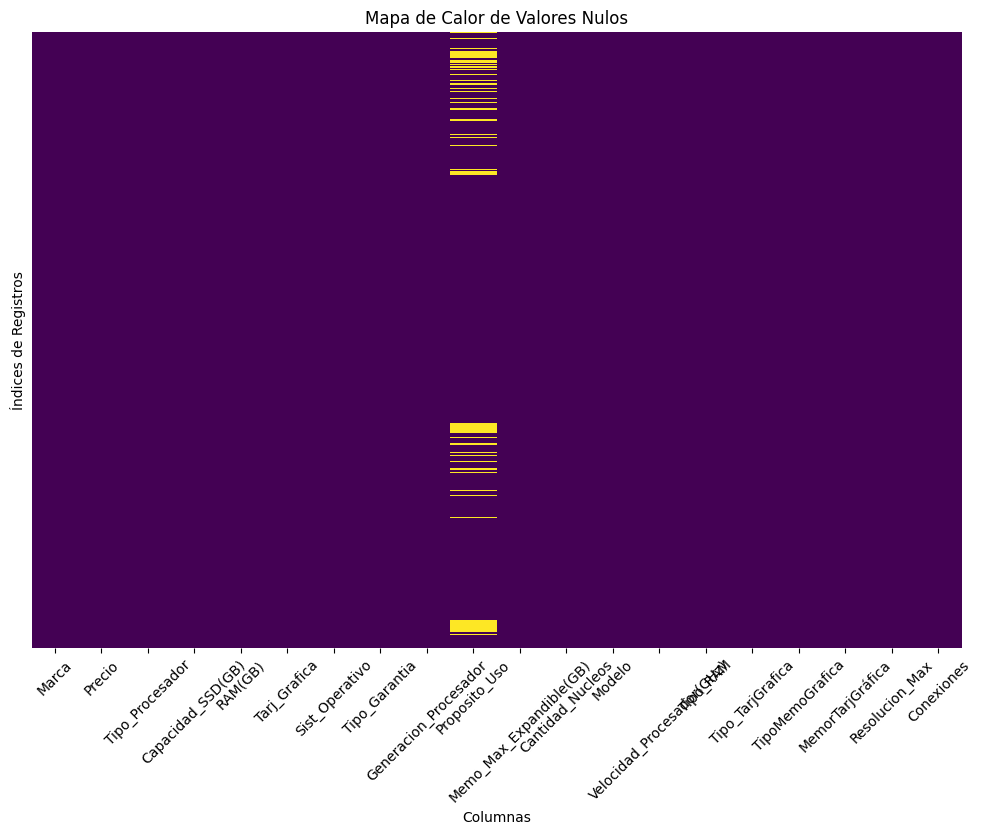

In [46]:
# gráfico de calor que muestre visualmente la presencia de valores nulos en tu DataFrame
#Crear un DataFrame que marque los valores nulos como True
null_heatmap = df_Proy.isnull()

# Crea el gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(null_heatmap, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Mapa de Calor de Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Índices de Registros')
plt.xticks(ticks=np.arange(len(null_heatmap.columns)) + 0.5, labels=null_heatmap.columns, rotation=45)
plt.show()

# 5- Análisis exploratorio de los datos

### 5.A Análisis Univariado

##### Analisis Variable PRECIO (Target)

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000., 225000.]),
 [Text(-25000.0, 0, '−25000'),
  Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000'),
  Text(175000.0, 0, '175000'),
  Text(200000.0, 0, '200000'),
  Text(225000.0, 0, '225000')])

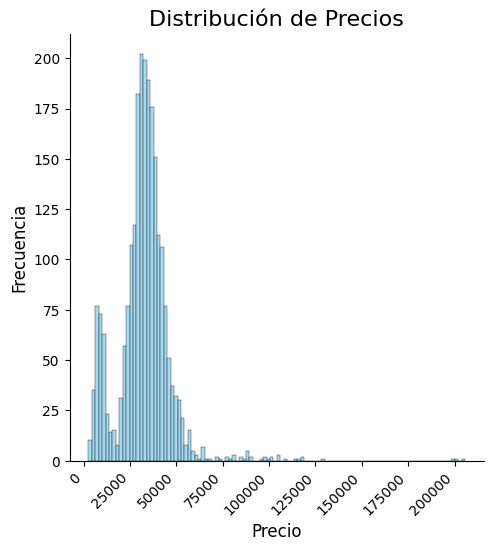

In [47]:
sns.displot(df_Proy['Precio'], color='skyblue', edgecolor='black')
plt.title('Distribución de Precios', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right')

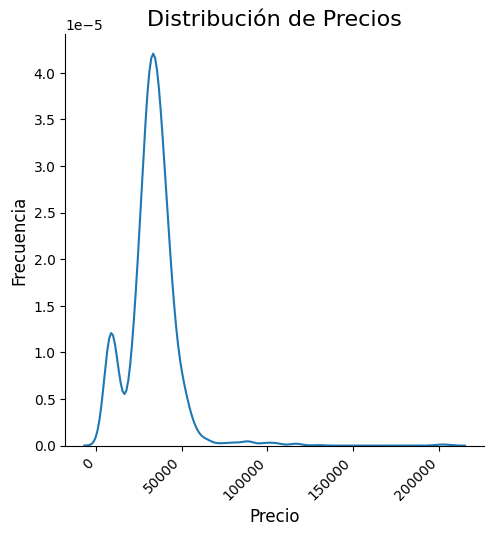

In [48]:
sns.displot(df_Proy['Precio'], kind='kde')
plt.title('Distribución de Precios', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

###### Conclusion

La forma de la distribucion presenta un sesgo hacia la izquierda y presenta multiples picos. Podemos observar que los precios representados en el eje X comienzan en 0 y se extienden hasta aproximadamente 200000. En el eje Y se muestra cuantas veces aparece un precio dentro de un rango especifico.

De acuerdo al grafico podemos observar:

Pico Principal: entre los 30000 y 40000 se encuentra un pico pronunciado, lo que se interpreta que el conjunto de datos en su mayoria tiene precios en ese rango.
Segundo Pico: este pico algo menor, se encuentra entre los 5000 y 15000, por lo que se podria decir que en este rango se encuentra una cantidad importante de observaciones
Asimetria: Se observa una cola que se extiende hacia la derecha (precios mayores), aunque la mayoria de los precios se encuentran entre los rangos mas bajos, existen algunos precios mucho mas altos que los mas frecuentes.

##### Analisis Variable MARCA

Text(0.5, 0, 'Marca')

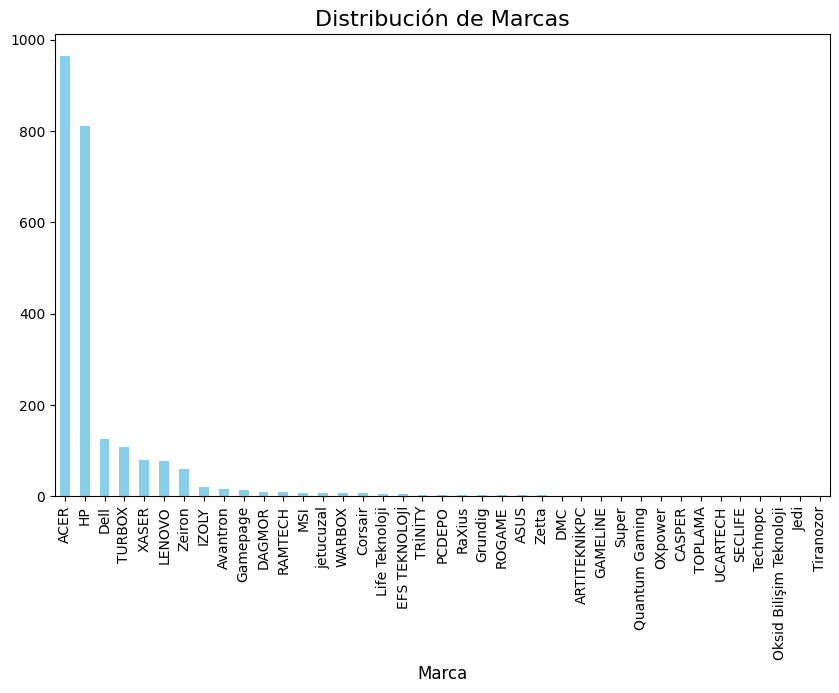

In [49]:
plt.figure(figsize=(10, 6))
df_Proy['Marca'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Marcas', fontsize=16)
plt.xlabel('Marca', fontsize=12)

###### Conclusion

Haciendo un analisis por MARCA podermos concluir lo siguiente:

La marca "ACER" es la mayoritaria en el conjunto de datos.
La marca "HP" también tiene una presencia significativa, aunque mucho menos frecuente que "ACER".
Varias marcas como "Dell", "TURBOX", "XASER", "LENOVO", etc tienen una presencia moderada.
Una gran cantidad de marcas aparecen con muy poca frecuencia.

### 5.B Análisis Bivariado

<ipython-input-50-f6998d15eb41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marca', y='Precio', data=df_Proy, palette='viridis')


Text(0, 0.5, 'Precio')

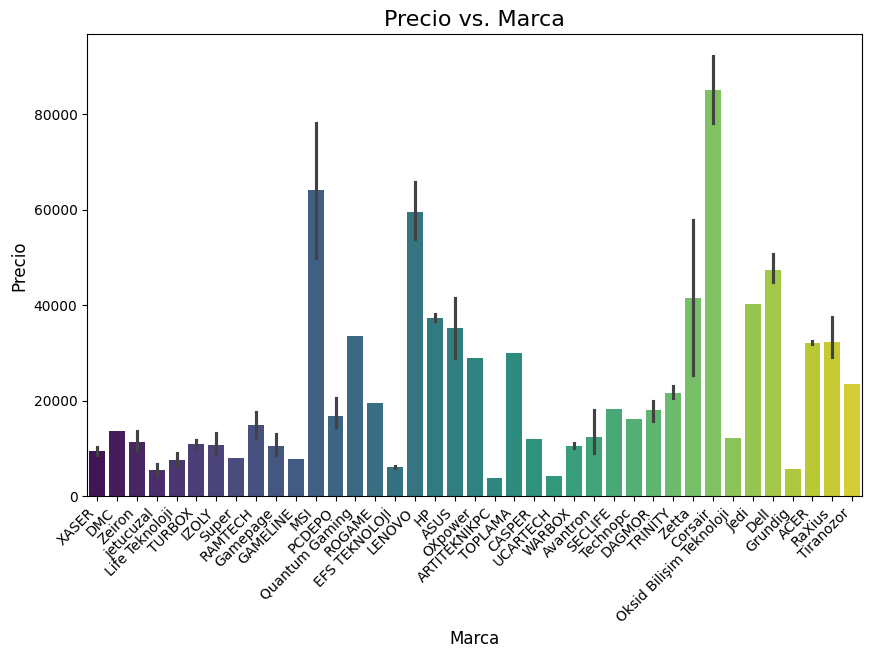

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marca', y='Precio', data=df_Proy, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Precio vs. Marca', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Precio', fontsize=12)


#### Conclusion


Este grafico esta mostrando la comparacion del precio promedio de diferentes marcas, como asi tambien la dispercion de los precios dentro de cada marca. Se puede identicar que marcas tienden a ser mas caras o mas baratas y cuales tienden a tener una gama de precios mas amplias.

Por ejemplo:

Las Marcas MSI, Lenovo, Zerra, Corsair, Dell son las marcas con el precio promedio mas alto, pero presentan una variabilidad considerables en sus precios - barras de error relativamente largas -


### 5.C Análisis Multivariado

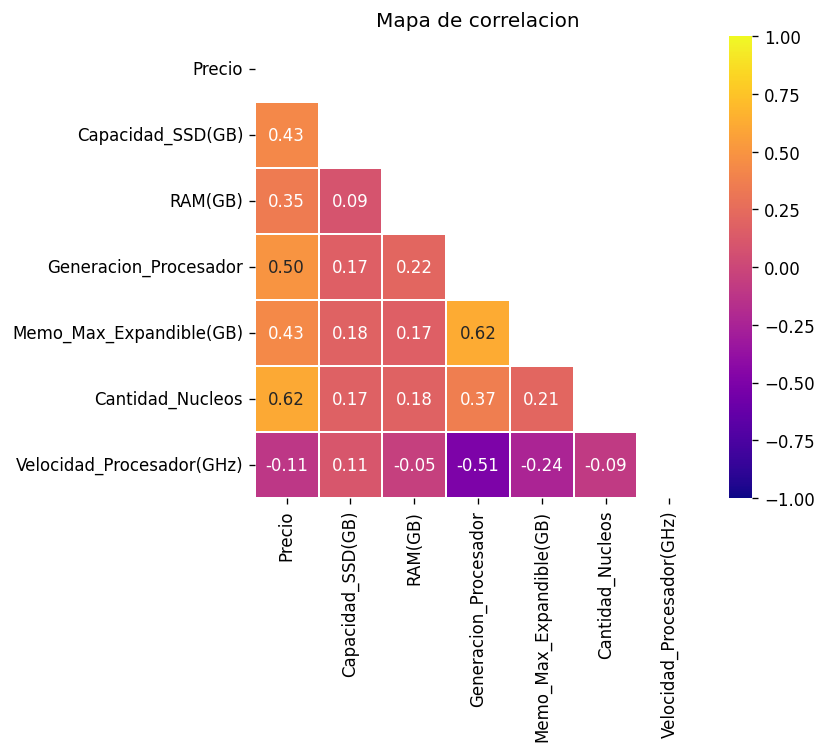

In [51]:
#Correlaciones
plt.figure(dpi = 120,figsize= (6,5))

corr_mat = df_Proy.select_dtypes('number').corr()
mask = np.triu(np.ones_like(corr_mat,dtype = bool))

sns.heatmap(corr_mat,
            mask = mask,
            annot=True,
            fmt = ".2f",
            lw=1,
            cmap = 'plasma',
            vmin=-1,
            vmax=1
            )

plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Mapa de correlacion')
plt.show()

#### Conclusiones

1- Correlación con el Precio:

Cantidad_Nucleos (0.62):Posee una correlación positiva más fuerte con el Precio. Esto nos lleva a decir que las computadoras con más núcleos de procesador tienden a ser más caras.

Generacion_Procesador (0.50): Posee una correlación positiva moderada con el Precio, por lotanto generaciones de procesadores más nuevas tienden a tener precios más altos.

Capacidad_SSD(GB) (0.43) y Memo_Max_Expandible(GB) (0.43): Muestran una correlación positiva similar, aunque un poco más débil, con el Precio. Las computadoras con mayor capacidad de SSD y mayor memoria máxima expandible tienden a tener un precio mas elevado.

RAM(GB) (0.35): Presenta una correlación positiva más débil con el Precio. Más RAM se asocia con precios más altos, pero la relación no es tan fuerte.

Velocidad_Procesador(GHz) (-0.11): Muestra una correlación negativa muy débil con el Precio. Esto nos lleva a decir que no es una caracteristica que influya en el precio de la computadora.



2- Correlación entre Otras Características:

Generacion_Procesador y Velocidad_Procesador(GHz) (-0.51): Muestran una correlación negativa moderada. Esto podría indicar que las generaciones de procesadores más nuevas no necesariamente tienen velocidades de reloj más altas.

Memo_Max_Expandible(GB) y Generacion_Procesador (0.62): Tienen una correlación positiva moderada, lo que podría sugerir que las generaciones de procesadores más nuevas tienden a admitir más memoria expandible.

Cantidad_Nucleos y Memo_Max_Expandible(GB) (0.21): También tienen una correlación positiva, aunque más débil.